<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#First thing first importing the necessary libraries. 
##Following are the libraries:-

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




In [ ]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

import warnings
warnings.filterwarnings('ignore')
from numpy import math

##Now we are ready to mount the google drive using following code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#After mounting the gdrive we are ready to load our dataset.
we have Online retail data.In which we have diffrent observations which give us some intuition about different segmentation.


In [ ]:
# Read The Datset "Online Retail"
# Use Panda Library To read The Excel file
retail_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Online Retail Customer Segmentation - Lovejeet Singh/Online Retail.xlsx')

##Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.

In [ ]:
#Checking the Number of rows and columns using Shape methods
retail_df.shape

(541909, 8)

#We have 541909 observations/Rows and 8 Features.

#Getting a glimps of our dataset using Head Function. 

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


#Using info() method we can easily get the idea of what kind of data type and null values inside our dataframes we have.

In [ ]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Observations**
* # There are null values in CustomerID and Description.
* # Datatype of InvoiceDate is object need to convert it into datatime.
 

In [ ]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

#So, as we can see that in CustomerID we have 135080 null values and description feature has 1454 null values.

#We have to drop these null values. 

In [ ]:
#droping null values 
retail_df.dropna(inplace=True)

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


#Checking the shape of our dataset after removing null values.

In [ ]:
retail_df.shape

(406829, 8)

#After removeing null value in our dataset .it reduces to (406829, 8)

##Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [ ]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


*  # the Quantity feature shows negative value which is not possible.
*  # UnitPrice has 0 as min value.
*  # We have to explore thses feature.

In [ ]:
# dataframe have negative valiues in quantity.
retail_df[retail_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


#We have 8905 observation which shows negative quantity or order cancellation. So, we have to remove those rows.

In [ ]:
# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [ ]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

#Now checking the shape after removing negative quantity or order cancellation rows.

In [ ]:
retail_df.shape

(397924, 8)

#Now exploring the unitPrice feature which also shows minimum value as 0.

In [ ]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(retail_df[retail_df['UnitPrice']==0])

40

In [ ]:
# taking unitprice values greater than 0.
retail_df = retail_df[retail_df['UnitPrice']>0]

#Now checking the shape of our final dataset.

In [ ]:
retail_df.shape

(397884, 8)

#So, finally we have 397884 observation and 8 features.

In [ ]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#Getting the columns

In [ ]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Feature Engineering**

#we have to make new feature from are datetime feature.

In [ ]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

#Extracting year, Month, Day, Hour and Minute.

In [ ]:
#decomposing datetime feature
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [ ]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

# In our dataset we have quantity and unitprice so we can make a new feature totalAmount by multiple both the column 

In [ ]:
retail_df['TotalAmount'] = retail_df['Quantity'] * retail_df['UnitPrice']

#We also know that we have a feature called hour so we have to label them as Morning, Afternoon and Evening.

In [ ]:
def time(time):
  '''This function takes time and return time frame label fro example morning, afternoon and evening.'''
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'   

In [ ]:
retail_df['Day_time_type'] = retail_df['hour'].apply(time)

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount,Day_time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning


# **EDA(Exploratory Data Analysis)**

#Finding the top ten product.

In [ ]:
#getting top 10 product/description
top_10_product = retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


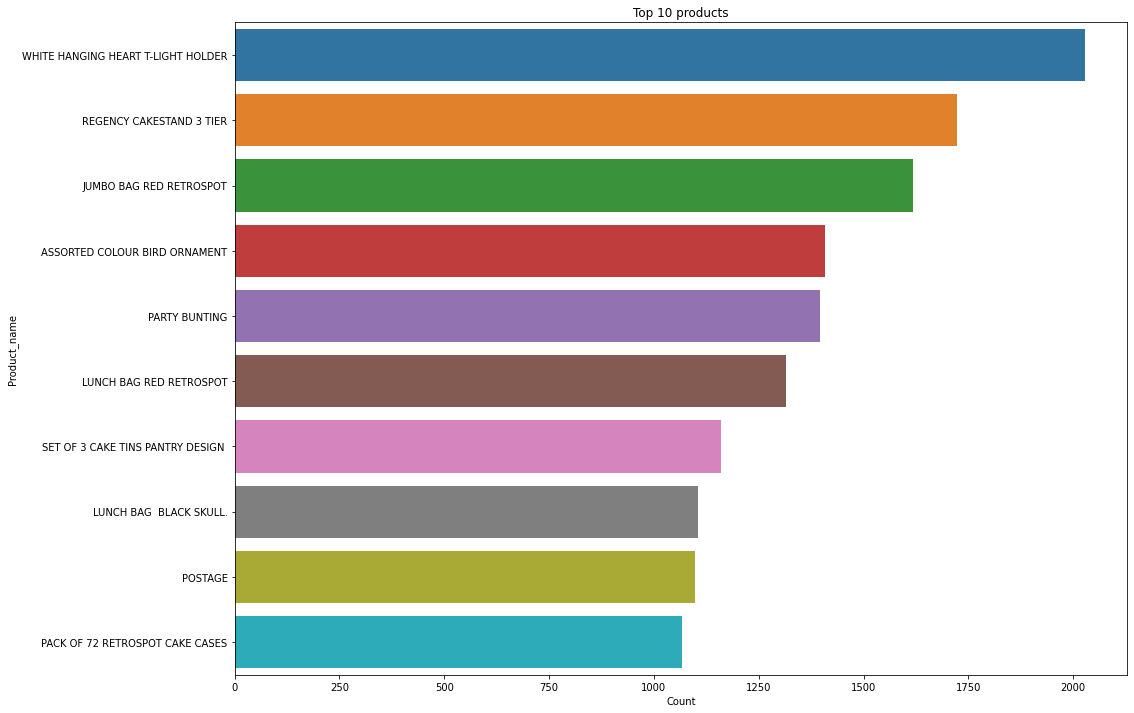

In [ ]:
# top 10 product in terms of description
plt.figure(figsize=(16,12))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')
plt.show()


* # WHITE HANGING HEART T-LIGHT HOLDER	is the highest selling product almost 2018 units were sold.
* # REGENCY CAKE STAND 3 TIER is the 2nd highest selling product almost 1723 units were sold.

#Finding 10 items which rarly sold.

In [ ]:
bottom_10_product = retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

,Product_name,Count
3867,BLUE FELT HANGING HEART WITH FLOWER,1
3868,GLASS CAKE COVER AND PLATE,1
3869,CRACKED GLAZE EARRINGS RED,1
3870,SCALLOP SHELL SOAP DISH,1
3871,NECKLACE+BRACELET SET PINK DAISY,1
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


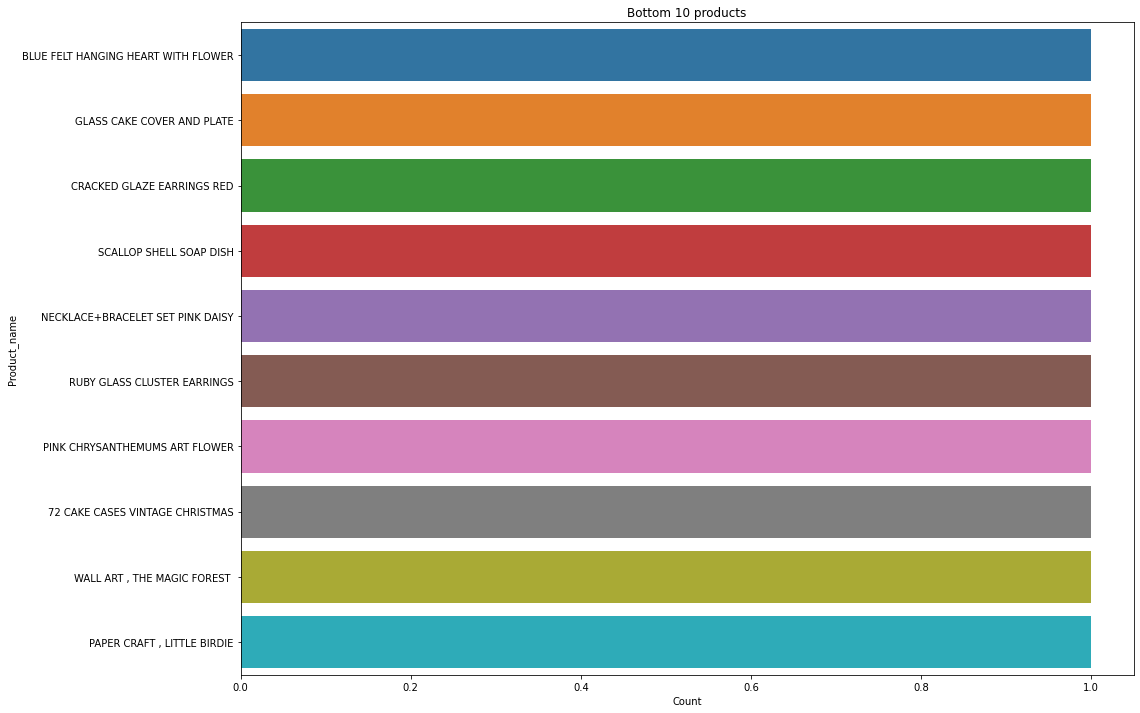

In [ ]:
# bottom 10 product in terms of description
plt.figure(figsize=(16,12))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 products')
plt.show()

#These are the top 10 rarely sold product which has sold count 1.

#Knowing top 10 items in terms of StockCode.

In [ ]:
#using value_count function we are able to get the total count for each stockcode.
top_10_StockCodes = retail_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

,StockCode,Count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


#With the help of seaborn library we are able to visualize.

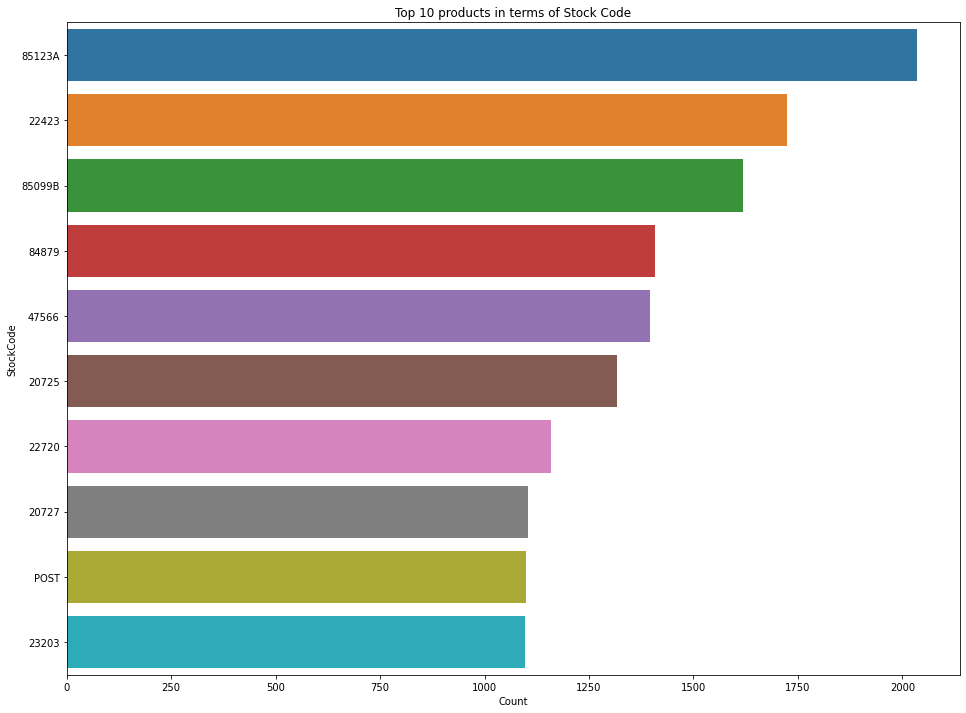

In [ ]:
# top 10 product in terms of StcokCode
plt.figure(figsize=(16,12))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 products in terms of Stock Code')
plt.show()

* # StockCode-85123A is the first highest selling product.
* # StockCode-22423 is the 2nd highest selling product.

In [ ]:
top_10_customers = retail_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

,CustomerID,Products_purchasing_Count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


Text(0.5, 1.0, 'Top 10 frequent Customers.')

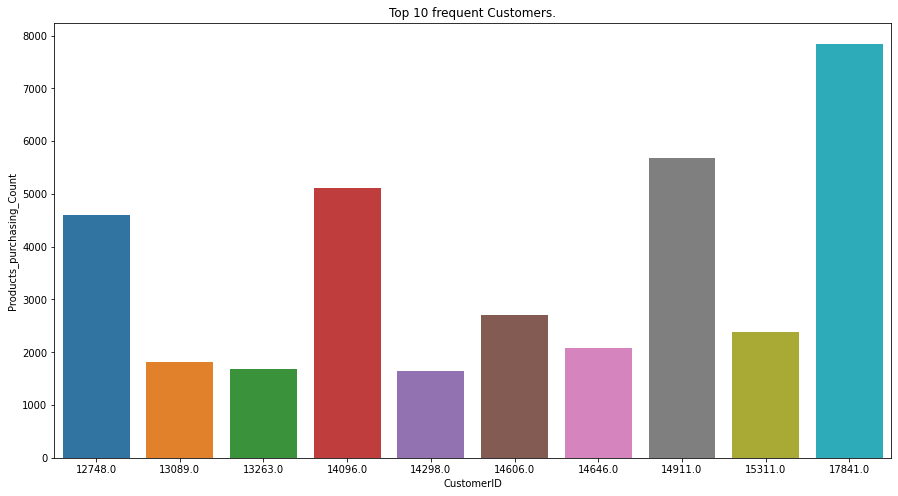

In [ ]:
# Top 10 frequent Customers
plt.figure(figsize=(15,8))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

# From the above chart Following are the Observation:-
* # CustomerID- 17841 had purchased highest number of products.
* # CustomerID-14911 is the 2nd higest customer who purchased the most the products.


# Now checking the which country has heighest number of customers.

In [ ]:
#getting the country which has highest number of customers
top_5_countries = retail_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
top_5_countries.head(10)

,Country,Customer_count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


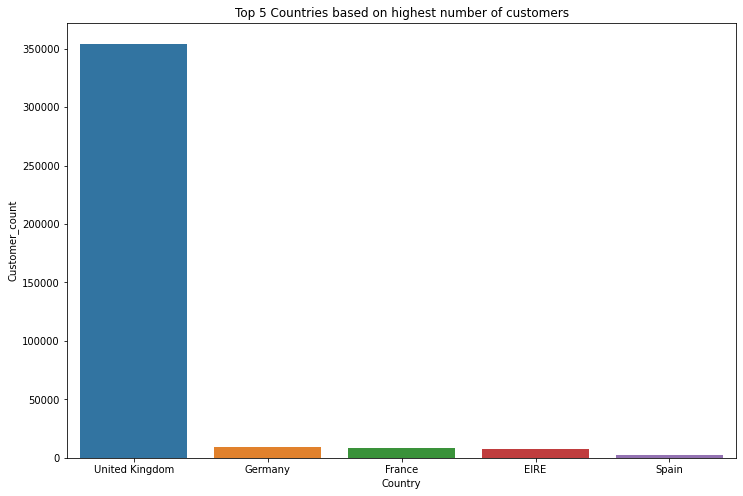

In [ ]:
# top 5 countries where max sell happens.
plt.figure(figsize=(12,8))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')
plt.show()

# From the above chart Following are the Observation:-
* # UK has highest number of customers.
* # Germany,France and IreLand has almost equal number of customers.

#Knowing the country where less sell happens or less number of customers.

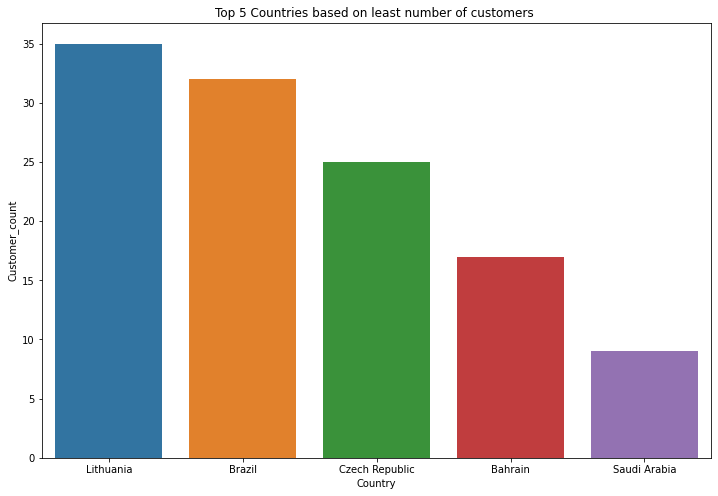

In [ ]:
# top 5 countries where min sell happens.
plt.figure(figsize=(12,8))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')
plt.show()

# From the above chart Following are the Observation:-
* # There are very less customers from Saudi Arabia.
* # Bahrain is the 2nd Country having least number of customers.

#Checking the sales according to month. 

In [ ]:
#Sales according to month 
sales_in_month = retail_df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


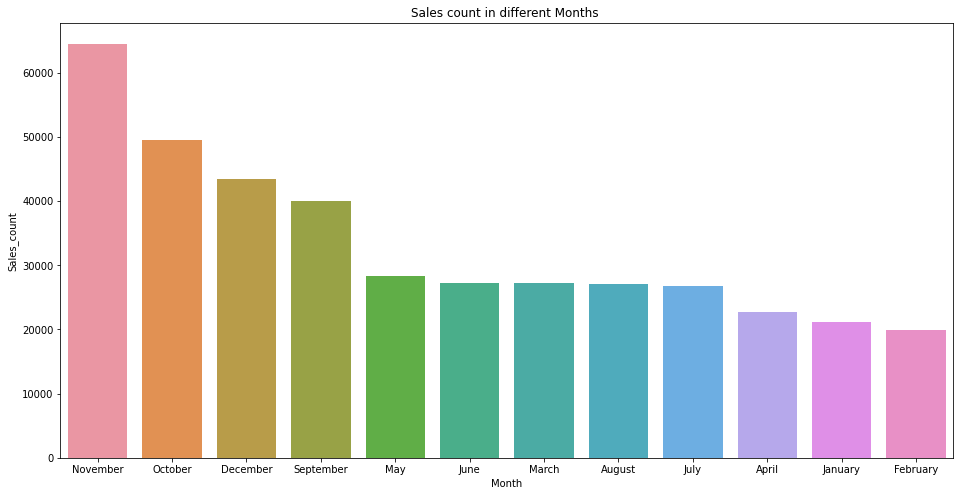

In [ ]:
# Sales count in different months.
plt.figure(figsize=(16,8))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')
plt.show()

#From the above chart Following are the Observation:-
* # Most of the sale happened in Novmenber month.
* # February Month had least sales.

#Now Checking the sales according to day.

In [ ]:
#Sales according to day
sales_on_day_basis = retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


Text(0.5, 1.0, 'Sales count on different Days ')

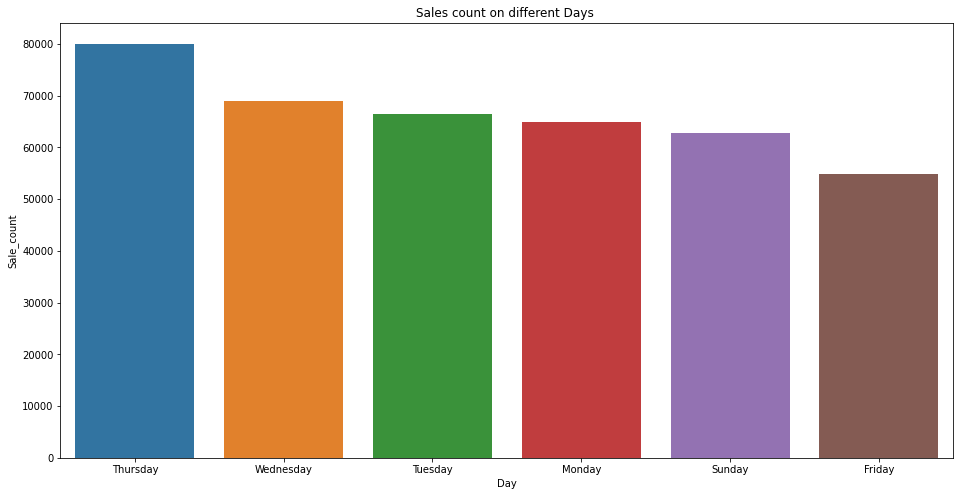

In [ ]:
# Sales count on different days.
plt.figure(figsize=(16,8))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

# From the above chart Following are the Observation:-
* # Sales On Thursdays are very high.
* # Sales On Fridays are very less.

#Now checking at what time maximum sales happen or rush time.

In [ ]:
sales_timing = retail_df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

,Day_time_type,Sales_count
0,Afternoon,272738
1,Morning,118095
2,Evening,7051


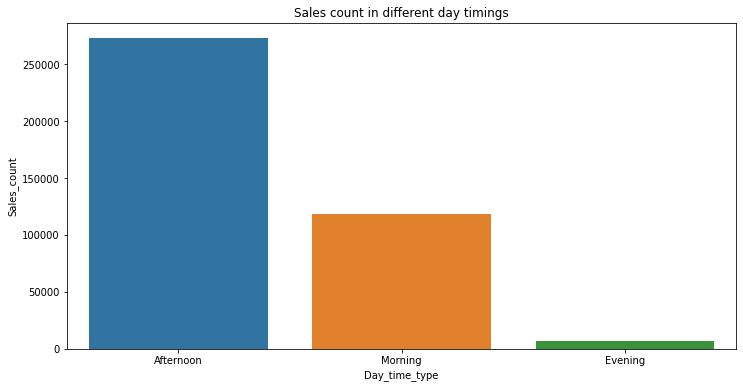

In [ ]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')
plt.show()

# From the above chart Following are the Observation:-

* # Most of the sales happens in the afternoon.
* # Least sales happens in the evening.

#Knowing the average amount spend by an customer.

In [ ]:
avg_amount = retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)
avg_amount

,CustomerID,Avg_amount_per_customer
0,12346.0,77183.600000
3008,16446.0,56157.500000
2011,15098.0,13305.500000
2502,15749.0,4453.430000
2087,15195.0,3861.000000
...,...,...
3590,17254.0,2.432500
697,13271.0,2.264375
990,13684.0,2.241000
3995,17816.0,2.150588


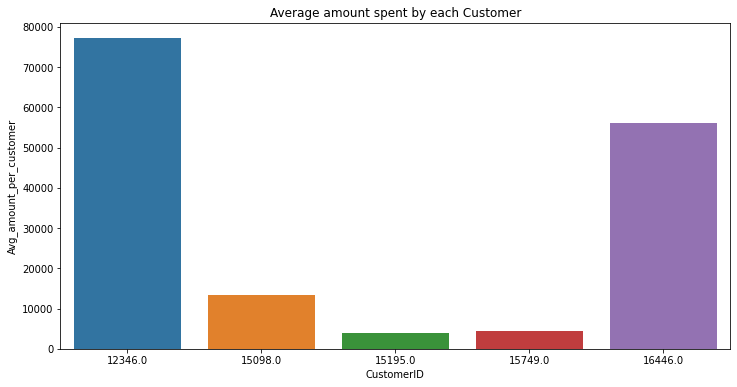

In [ ]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')
plt.show()

#From the above chart Following are the Observation:-
* # 77183 (Dollars)is the highest average amount spent by the CustomerID-12346.
* # 56157 (Dollars) is the 2nd  highest average amount spent by the CustomerID-16446.

In [ ]:
final_retail_df = retail_df.copy()

#Anomaly Detection

## Isolation Forest

Isolation Forest is an algorithm to detect outliers that returns the anomaly score of each sample using the IsolationForest algorithm which is based on the fact that anomalies are data points that are few and different. Isolation Forest is a tree-based model. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.

The following process shows how IsolationForest behaves in the case of the Susperstore’s sales, and the algorithm is implemented in Sklearn:

* Trained IsolationForest using the Sales data.
* Store the Sales in the NumPy array for using in our models later.
* Computed the anomaly score for each observation. The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.
* Classified each observation as an outlier or non-outlier.
* The visualization highlights the regions where the outliers fall.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

#Univariate Anomaly Detection on Quantity

In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(final_retail_df['Quantity'].values.reshape(-1, 1))
final_retail_df['anomaly_score_univariate_Quantity'] = isolation_forest.decision_function(final_retail_df['Quantity'].values.reshape(-1, 1))
final_retail_df['outlier_univariate_Quantity'] = isolation_forest.predict(final_retail_df['Quantity'].values.reshape(-1, 1))

#Univariate Anomaly Detection on UnitPrice





In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(final_retail_df['UnitPrice'].values.reshape(-1, 1))
final_retail_df['anomaly_score_univariate_UnitPrice'] = isolation_forest.decision_function(final_retail_df['UnitPrice'].values.reshape(-1, 1))
final_retail_df['outlier_univariate_UnitPrice'] = isolation_forest.predict(final_retail_df['UnitPrice'].values.reshape(-1, 1))

#Multivariate Anomaly Detection

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(final_retail_df[['Quantity','UnitPrice']])

In [ ]:

clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(X)

# predict raw anomaly score
final_retail_df['multivariate_anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
final_retail_df['multivariate_outlier'] = clf.predict(X)

In [ ]:
final_retail_df[final_retail_df['multivariate_outlier']==-1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount,Day_time_type,anomaly_score_univariate_Quantity,outlier_univariate_Quantity,anomaly_score_univariate_UnitPrice,outlier_univariate_UnitPrice,multivariate_anomaly_score,multivariate_outlier
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom,2010,12,1,9,58,December,Wednesday,733.44,Morning,-0.051001,-1,0.253742,1,-0.033110,-1
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,2010,12,1,9,58,December,Wednesday,647.04,Morning,-0.051001,-1,0.203432,1,-0.029968,-1
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,2010,12,1,9,58,December,Wednesday,647.04,Morning,-0.051001,-1,0.203432,1,-0.029968,-1
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,16029.0,United Kingdom,2010,12,1,9,58,December,Wednesday,626.40,Morning,-0.090819,-1,0.279097,1,-0.081872,-1
182,536387,21731,RED TOADSTOOL LED NIGHT LIGHT,432,2010-12-01 09:58:00,1.25,16029.0,United Kingdom,2010,12,1,9,58,December,Wednesday,540.00,Morning,-0.090819,-1,0.325437,1,-0.082141,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540314,581476,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,192,2011-12-09 08:48:00,1.06,12433.0,Norway,2011,12,9,8,48,December,Friday,203.52,Morning,-0.051001,-1,0.231160,1,-0.026718,-1
540342,581476,16008,SMALL FOLDING SCISSOR(POINTED EDGE),240,2011-12-09 08:48:00,0.12,12433.0,Norway,2011,12,9,8,48,December,Friday,28.80,Morning,-0.069096,-1,0.114611,1,-0.061205,-1
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,12,9,9,15,December,Friday,168469.60,Morning,-0.108872,-1,0.311666,1,-0.096695,-1
541545,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,2011-12-09 10:46:00,0.19,12985.0,United Kingdom,2011,12,9,10,46,December,Friday,34.20,Morning,-0.048245,-1,0.140863,1,-0.023205,-1


In [ ]:
Anomaly_df = final_retail_df[(final_retail_df['outlier_univariate_Quantity'] == 1) & (final_retail_df['outlier_univariate_UnitPrice'] == 1) & (final_retail_df['multivariate_outlier'] == -1)]
Anomaly_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount,Day_time_type,anomaly_score_univariate_Quantity,outlier_univariate_Quantity,anomaly_score_univariate_UnitPrice,outlier_univariate_UnitPrice,multivariate_anomaly_score,multivariate_outlier
6607,536970,22423,REGENCY CAKESTAND 3 TIER,120,2010-12-03 13:12:00,10.95,17949.0,United Kingdom,2010,12,3,13,12,December,Friday,1314.00,Afternoon,0.000000,1,0.067412,1,-0.029839,-1
14784,537618,22423,REGENCY CAKESTAND 3 TIER,80,2010-12-07 13:50:00,10.95,15061.0,United Kingdom,2010,12,7,13,50,December,Tuesday,876.00,Afternoon,0.044512,1,0.067412,1,-0.007549,-1
31603,538998,22423,REGENCY CAKESTAND 3 TIER,80,2010-12-15 12:08:00,10.95,15061.0,United Kingdom,2010,12,15,12,8,December,Wednesday,876.00,Afternoon,0.044512,1,0.067412,1,-0.007549,-1
58122,541220,22838,3 TIER CAKE TIN RED AND CREAM,96,2011-01-14 14:11:00,12.75,14156.0,EIRE,2011,1,14,14,11,January,Friday,1224.00,Afternoon,0.041408,1,0.068796,1,-0.026535,-1
89826,543976,22423,REGENCY CAKESTAND 3 TIER,72,2011-02-14 15:26:00,10.95,13089.0,United Kingdom,2011,2,14,15,26,February,Monday,788.40,Afternoon,0.052027,1,0.067412,1,-0.001718,-1
106278,545320,22838,3 TIER CAKE TIN RED AND CREAM,96,2011-03-01 14:47:00,12.75,14156.0,EIRE,2011,3,1,14,47,March,Tuesday,1224.00,Afternoon,0.041408,1,0.068796,1,-0.026535,-1
108007,545475,21217,RED RETROSPOT ROUND CAKE TINS,120,2011-03-03 10:59:00,8.95,12415.0,Australia,2011,3,3,10,59,March,Thursday,1074.00,Morning,0.000000,1,0.125964,1,-0.020448,-1
116109,546213,23007,SPACEBOY BABY GIFT SET,36,2011-03-10 11:37:00,14.95,14156.0,EIRE,2011,3,10,11,37,March,Thursday,538.20,Morning,0.138951,1,0.000000,1,-0.012720,-1
116110,546213,23008,DOLLY GIRL BABY GIFT SET,36,2011-03-10 11:37:00,14.95,14156.0,EIRE,2011,3,10,11,37,March,Thursday,538.20,Morning,0.138951,1,0.000000,1,-0.012720,-1
116111,546213,23010,CIRCUS PARADE BABY GIFT SET,36,2011-03-10 11:37:00,14.95,14156.0,EIRE,2011,3,10,11,37,March,Thursday,538.20,Morning,0.138951,1,0.000000,1,-0.012720,-1


#Checking the shape of our anomaly detected dataset

In [ ]:
Anomaly_df.shape

(38, 23)

#We found 38 observation which detected as anomary so we simply remove these observation from our main dataset because these anomaly effect our final goal.

In [ ]:
final_retail_df = final_retail_df[(final_retail_df['outlier_univariate_Quantity'] == 1) & (final_retail_df['outlier_univariate_UnitPrice'] == 1) & (final_retail_df['multivariate_outlier'] == 1)]

In [ ]:
final_retail_df.shape

(390225, 23)

#So finally we have 390225 observation and 23 features. 

#     ---------------------------------------------------------------**Model Building**------------------------------------------------------

# **RFM Model Analysis:**

#**What is RFM?**

* ***RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.***

* ***RECENCY: How recently did the customer visit our website or how recently did a customer purchase?***

* ***Frequency: How often do they visit or how often do they purchase?***

* ***Monetary: How much revenue we get from their visit or how much do they spend when they purchase?***

# **Why it is Needed?**
***RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.***

***The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.***

In [ ]:
#Making a copy for our rmf model
rfm_dataframe = final_retail_df.copy()

In [ ]:
rfm_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount,Day_time_type,anomaly_score_univariate_Quantity,outlier_univariate_Quantity,anomaly_score_univariate_UnitPrice,outlier_univariate_UnitPrice,multivariate_anomaly_score,multivariate_outlier
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30,Morning,0.342236,1,0.277451,1,0.328324,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning,0.342236,1,0.203793,1,0.317353,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00,Morning,0.284992,1,0.254653,1,0.304376,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning,0.342236,1,0.203793,1,0.317353,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning,0.342236,1,0.203793,1,0.317353,1


In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_dataframe = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
# Descriptive Stats= Recency
rfm_dataframe.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.059474,91.720609,2054.266460
std,100.012264,228.785094,8989.230441
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,307.415000
50%,50.000000,41.000000,674.485000
75%,141.750000,100.000000,1661.740000
max,373.000000,7847.000000,280206.020000


#Now checking the distribution of our RMF

Text(0.5, 1.0, 'Distribution of Recency')

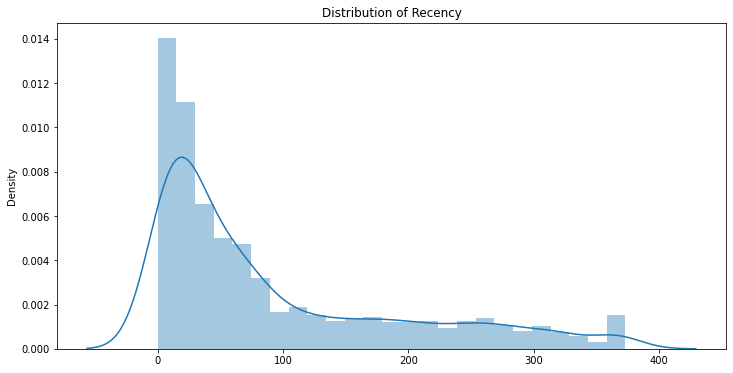

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')

#Distribution of Recency is right skewed.

Text(0.5, 1.0, 'Distribution of Frequency')

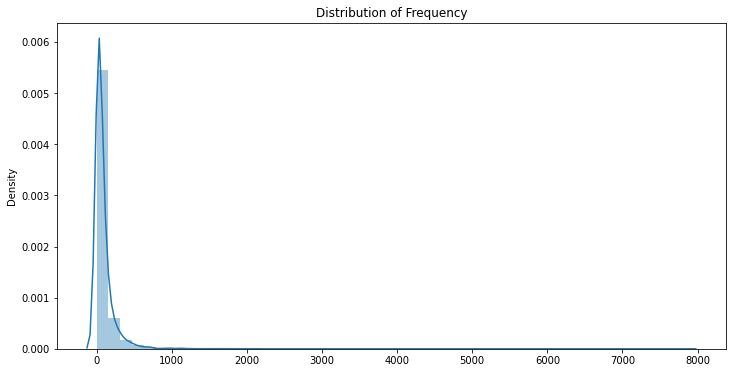

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of Frequency')

#Distribution of Frequency is highly right skewed.

Text(0.5, 1.0, 'Distribution of Monetary')

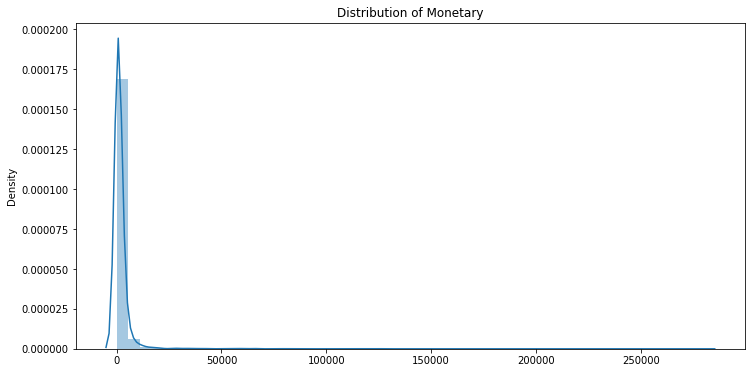

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.title('Distribution of Monetary')

#Distribution of Monetary is highly right skewed.

In [ ]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])

In [ ]:
quantile = quantile.to_dict()

In [ ]:
quantile

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75}}

#So we need to set an score for recency, frequency and monetary according to the quartiles  

In [ ]:
 #Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company



def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
# Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [ ]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

#Assigning the loyalty level to each customer 
* # Platinaum for most frequent customer.
* # Gold for frequent customer.
* # Silver for less frequent customer.
* # Bronz for very less frequent customer.

In [ ]:
# Assign Loyelty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinaum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinaum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronz


In [ ]:
# Validate the data For RFM group = 111
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinaum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinaum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinaum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinaum
4,14156.0,9,1400,117379.63,1,1,1,111,3,Platinaum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinaum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinaum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinaum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinaum
9,15311.0,0,2379,60767.90,1,1,1,111,3,Platinaum


#With the help of seaborn library we visualize the RFM_loyalty_level.

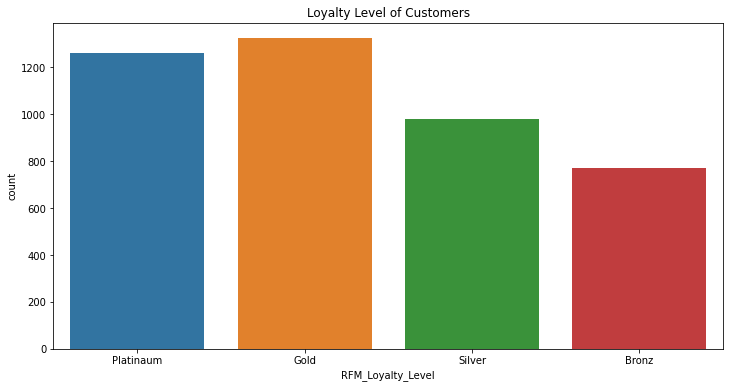

In [ ]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

#Getting the most frequent customer who has loyalty level Platinaum.

In [ ]:
#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinaum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinaum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinaum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinaum
4,12415.0,24,714,124914.53,2,1,1,211,4,Platinaum
5,14156.0,9,1400,117379.63,1,1,1,111,3,Platinaum
6,17511.0,2,963,91062.38,1,1,1,111,3,Platinaum
7,16029.0,38,242,81024.84,2,1,1,211,4,Platinaum
8,16684.0,4,277,66653.56,1,1,1,111,3,Platinaum
9,14096.0,4,5111,65164.79,1,1,1,111,3,Platinaum


#selecting only Recency, Frequency, Monetary and RMF_loyalty_level for clustering.

In [ ]:
segmentation_based_on_RFM = rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [ ]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           19.412510   0  140  228.559778  20  7847  5255.277617   
Gold                63.376133   0  372   57.959970   1   543  1169.031202   
Silver             126.029562   1  373   24.503568   1    99   583.936944   
Bronz              217.261039  51  373   10.955844   1    41   199.159506   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          360.93  280206.02  1263  
Gold               114.34  168472.50  1324  
Silver               6.90   77183.60   981  
Bronz                3.75     660.00   770

#As we can see that in recency platinaum and gold level shows min value as 0. so we have to replace them with 1.

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

#Now apply log tranformation to make our distribution more look like normal distribution.

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

#Now let's Visualize the Distribution of Recency,Frequency and Monetary.

Text(0.5, 1.0, 'Distribution of Recency')

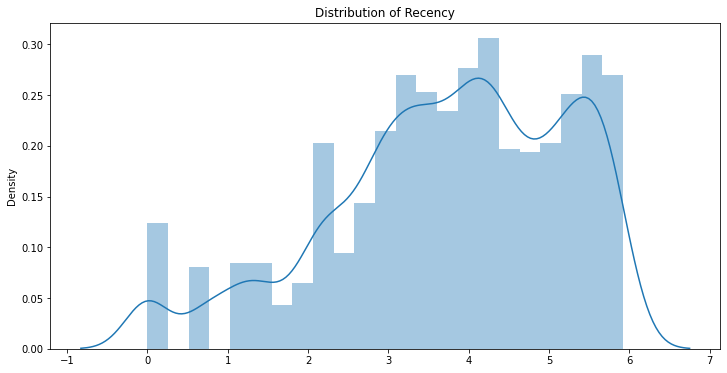

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('Distribution of Recency')

Text(0.5, 1.0, 'Distribution of Frequency')

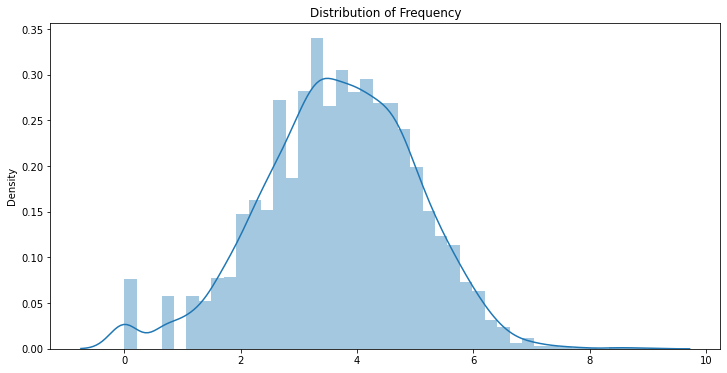

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetary')

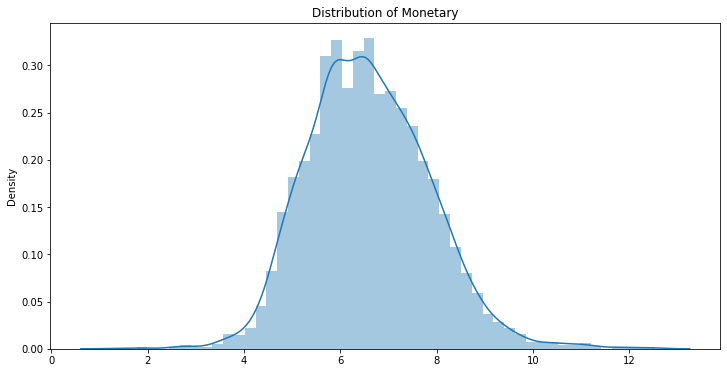

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Monetary'])
plt.title('Distribution of Monetary')

In [ ]:

rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [ ]:
rfm_dataframe

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,Platinaum,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2,2,1,221,5,Platinaum,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Bronz,5.624018,2.302585,5.196285
18281.0,180,7,80.82,4,4,4,444,12,Bronz,5.192957,1.945910,4.392224
18282.0,7,12,178.05,1,4,4,144,9,Silver,1.945910,2.484907,5.182064
